<a href="https://colab.research.google.com/github/shalinikarthick/shalinikarthick/blob/main/SILMPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Linear Regression**




In [1]:
#import library for linean regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1st Jar of ML**


**DATA**

In [3]:
dataset = pd.read_csv('student_scores.csv') #to read the dataset
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


I **CLEANING:**

		1. Missing data
          a. impute (replace values with mean, median, mode)
          b. deletion


In [4]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

2. Duplicates (delete data)

In [5]:
dataset = dataset.drop_duplicates()
dataset.shape

(25, 2)

3. Outliers

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.Hours.quantile(0.75)

7.4

In [8]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25)
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr)
lower_threshold

-4.3500000000000005

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data


5. Covert dtypes if it is not correct format

In [9]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

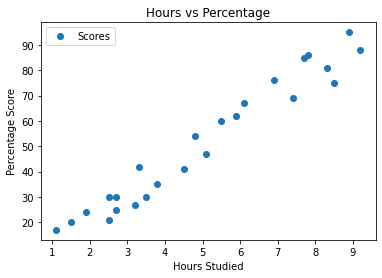

In [10]:
#Plot the data
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes 

3) No transformation is required

In [11]:
dataset.corr() # using coding we found the linear relationship bw feature and target using corelation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a linear relationship between hours and score =>

 we can go ahead and develop a linear regression model.
 
 
  No transformation required.




In [12]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

2. **Encoding**

        Here encoding is not needed, since the data is already numerical 

3.**SPLIT**

To split the data using sklearn model 

train data (70 - 80)%

test data (20 - 30)%

In [14]:
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

array([81, 86, 67, 21, 30])

In [15]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

**4. NORMALISING/SCALING DATA**

Scaling is not mandatory for linear regression


In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# shivaData = np.array([1.4,2.3,3.3,4,-4]).reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(shivaData)
# scaler.transform(shivaData)
# scaler.var_

In [16]:
X_test

array([[8.3],
       [7.8],
       [6.1],
       [2.5],
       [2.5]])

**II TASK**

It is a** SUPERVISED** learning problem
      In general, prediction is to be done based on the target variable

III **MODEL** 

In [18]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens  - GD(Gradient Descent) is done and we get the final values of m and c

LinearRegression()

In [19]:
print(regressor.intercept_)

3.160327881105701


In [20]:
print(regressor.coef_)

[9.56975986]


In [21]:
regressor.predict([[0]])

array([3.16032788])

In [22]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([82.58933473, 77.8044548 , 61.53586303, 27.08472753, 27.08472753])

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,82.589335
1,86,77.804455
2,67,61.535863
3,21,27.084728
4,30,27.084728


In [24]:
regressor.predict([[9.5]])

array([94.07304656])

**IV. LOSS FUNCTION**

	** Parameters can take "infinite" values (smart way to find parameter is Gradient Descent)
	* Loss function is a formula to find, how far my predictions are from "true target value"



**V LEARNING JAR**

	1. Hit & Trial (Time consuming)
	2. Gradient Descent 
		1. convex (function with "one" local minima), (GD work always)
		2. non - convex (function with "multiple" local minima), (GD may or may not work)



**VI. EVALUATION METRIC**

	* Formula used to find which model is "supervision model"
	*** R2 score


In [26]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9590422186522518


Since R2 score is 0.95 the modelis best model is our conclusion after applying ML over here.